In [65]:
# from numpy.ma.extras import average
# from scipy.special import label
# !pip install statsmodels
# !pip install seaborn
# !pip install scipy

In [66]:
import pandas as pd
df = pd.read_csv('Data/White_Variety.csv')
df = df[["Price Date", "Min Price (Rs./Quintal)", "Max Price (Rs./Quintal)", "Modal Price (Rs./Quintal)"]]
df_copy = df
# Convert 'Price Date' to datetime
df['Price Date'] = pd.to_datetime(df['Price Date'])

# Group by 'Price Date' and calculate the mean prices for each date
grouped_data = df.groupby("Price Date").mean()
average_prices = grouped_data.to_period("D")

In [67]:
average_prices

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Price Date,,,
2019-10-31,8476.100000,9156.250000,8854.900000
2019-11-01,8362.619048,10080.666667,9385.238095
2019-11-02,8228.023256,9744.162791,9147.720930
2019-11-03,8620.000000,8881.111111,8768.888889
2019-11-04,8185.625000,9976.950000,9199.375000
...,...,...,...
2024-10-26,9873.513514,11910.000000,11096.297297
2024-10-27,10366.666667,10916.666667,10635.166667
2024-10-28,10333.593750,11987.500000,11361.281250


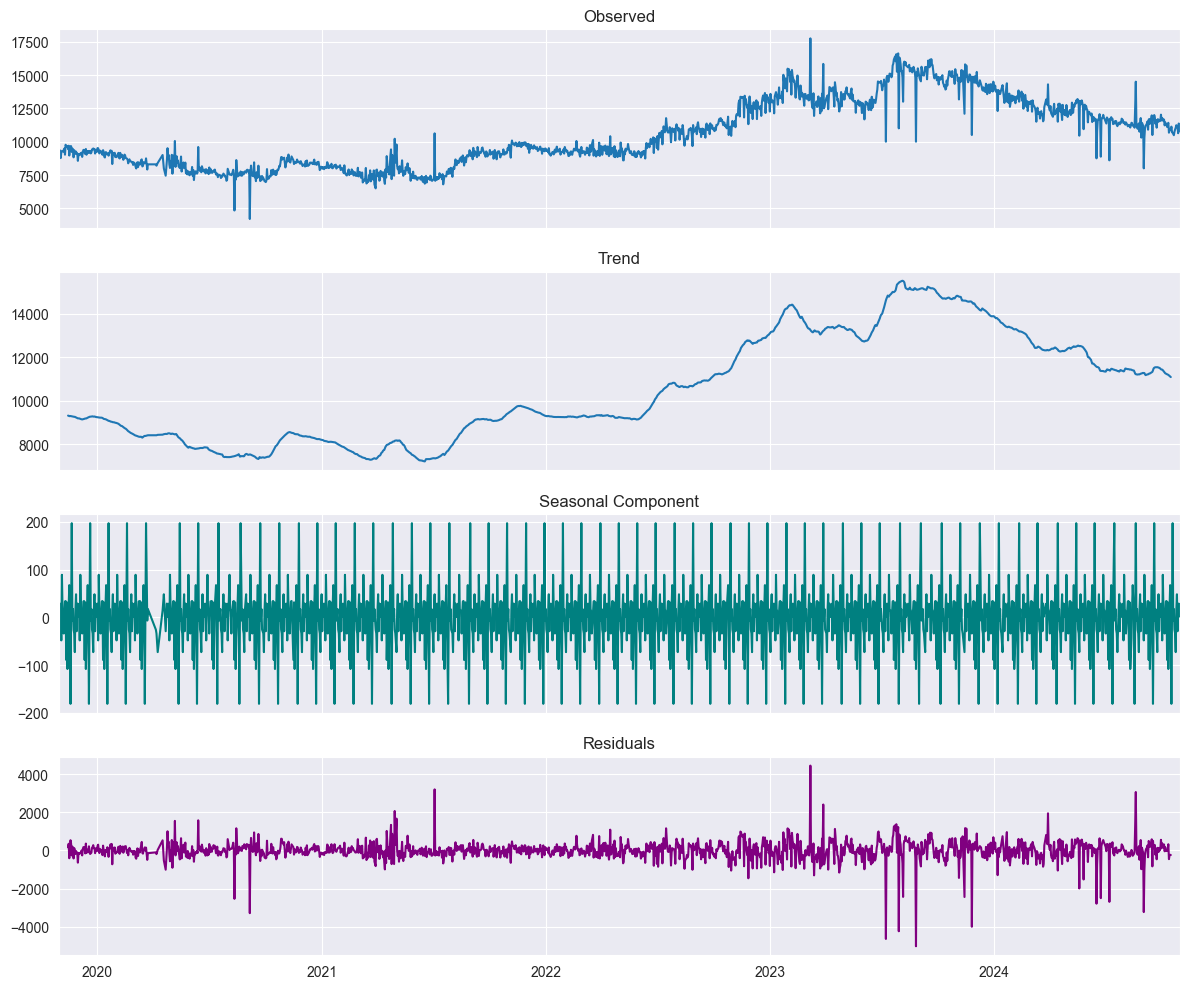

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
period = 30

decomposition = seasonal_decompose(average_prices['Modal Price (Rs./Quintal)'], model='additive', period=period)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal Component', color='teal')
decomposition.resid.plot(ax=ax4, title='Residuals', color='purple')
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


<class 'pandas.core.indexes.period.PeriodIndex'>


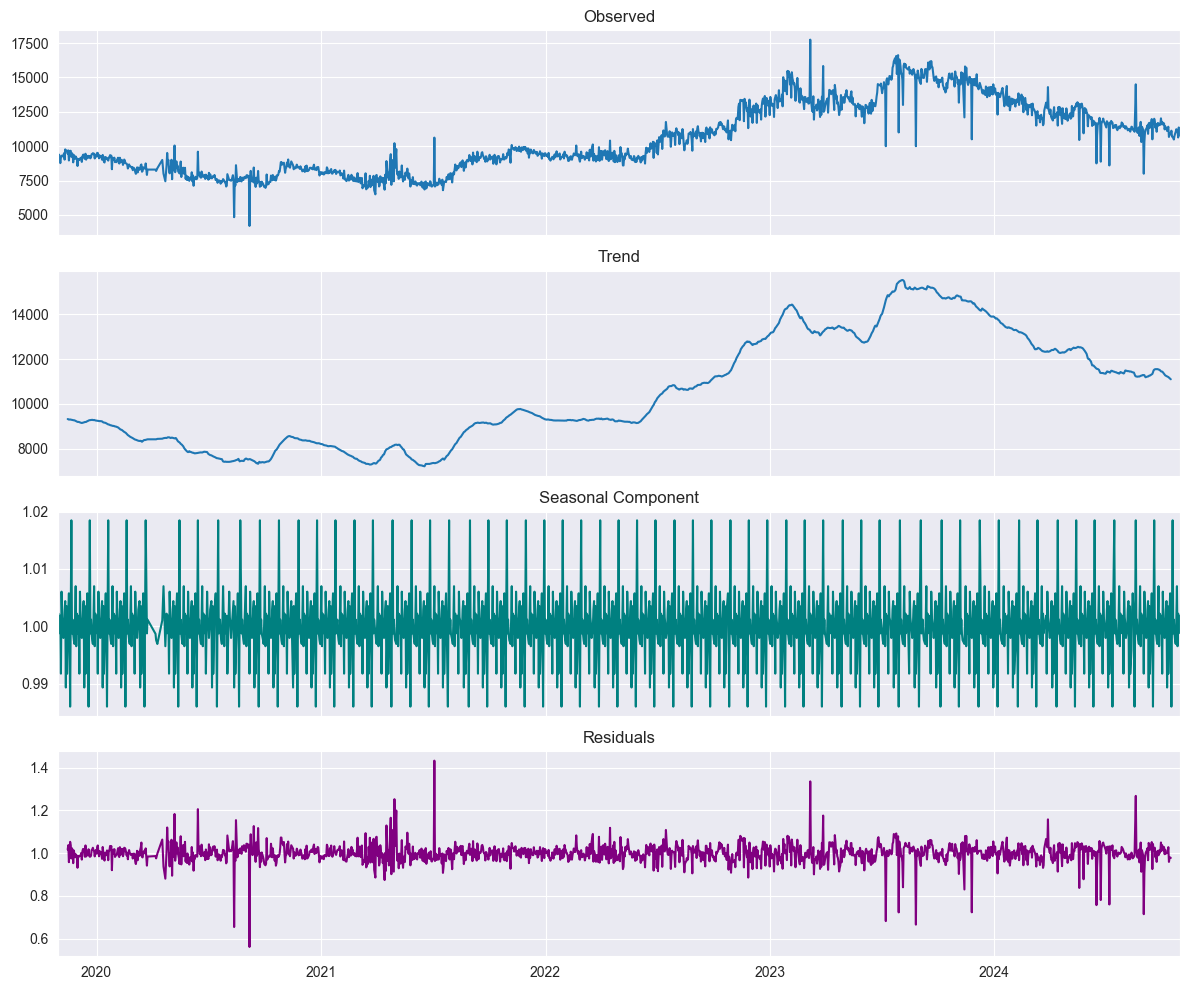

In [69]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
df = pd.read_csv('Data/White_Variety.csv')
df = df[["Price Date", "Min Price (Rs./Quintal)", "Max Price (Rs./Quintal)", "Modal Price (Rs./Quintal)"]]
df['Price Date'] = pd.to_datetime(df['Price Date'])
grouped_data = df.groupby("Price Date").mean()
average_prices = grouped_data.to_period("D")
print(type(average_prices.index))
if len(average_prices) >= 24:
    decomposition = seasonal_decompose(average_prices['Modal Price (Rs./Quintal)'], model='multiplicative', period=30)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
    decomposition.observed.plot(ax=ax1, title='Observed')
    decomposition.trend.plot(ax=ax2, title='Trend')
    decomposition.seasonal.plot(ax=ax3, title='Seasonal Component', color='teal')
    decomposition.resid.plot(ax=ax4, title='Residuals', color='purple')
    for ax in [ax1, ax2, ax3, ax4]:
        ax.grid(True)
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for seasonal decomposition.")


In [70]:
df

,Price Date,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,2019-10-31,7000,9000,8500.0
1,2019-10-31,8840,8840,8840.0
2,2019-10-31,8900,9250,9050.0
3,2019-10-31,8600,10140,9200.0
4,2019-10-31,9135,9930,9600.0
...,...,...,...,...
32912,2024-10-30,11400,11600,11500.0
32913,2024-10-30,11250,11450,11360.0
32914,2024-10-30,9500,9500,9500.0
32915,2024-10-30,10890,11200,11000.0


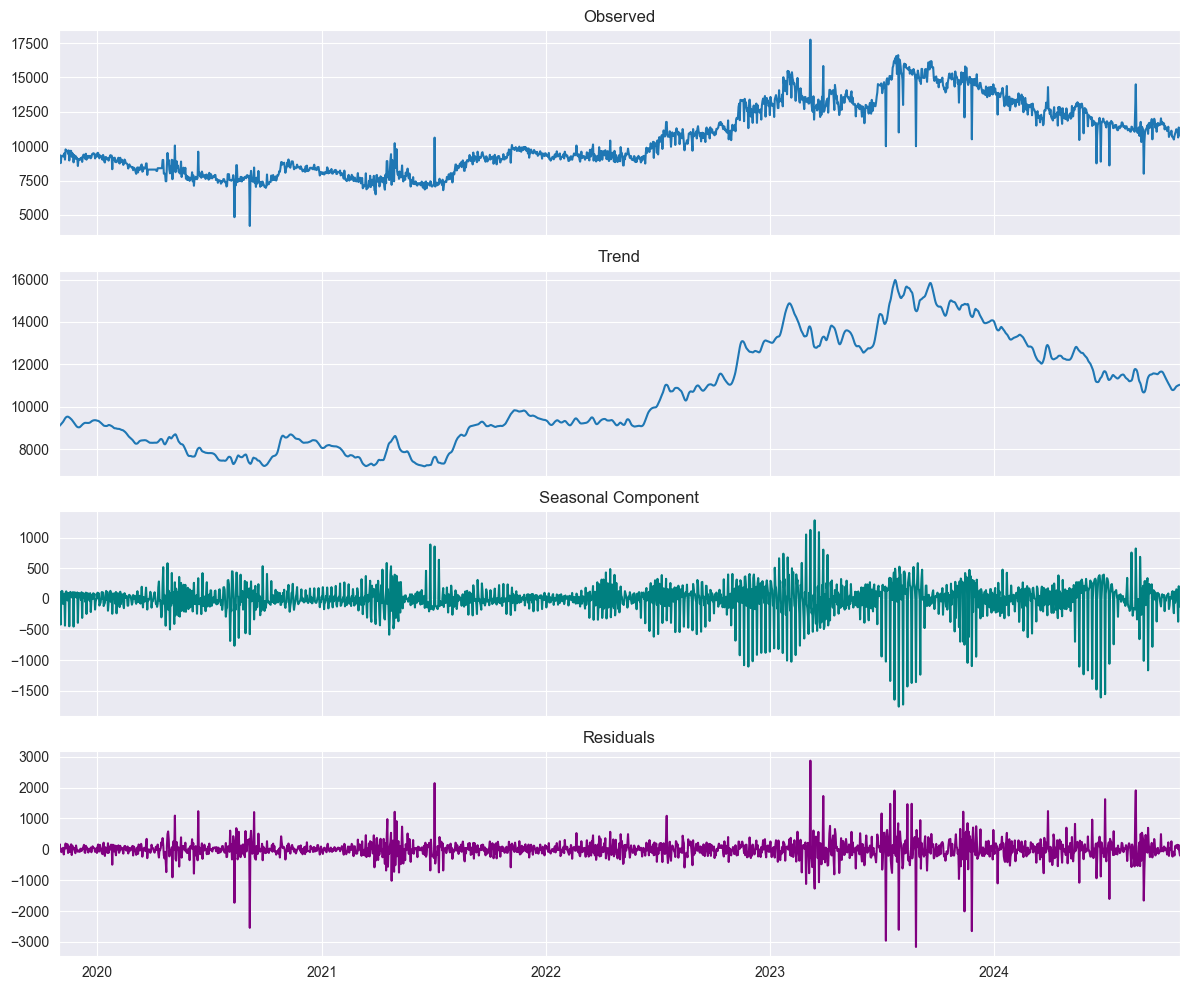

In [71]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Load and select columns
df = pd.read_csv('Data/White_Variety.csv')
df = df[["Price Date", "Modal Price (Rs./Quintal)"]]
df['Price Date'] = pd.to_datetime(df['Price Date'])
grouped_data = df.groupby("Price Date").mean()
average_prices = grouped_data.copy()
average_prices.index = pd.to_datetime(average_prices.index)
date_range = pd.date_range(start=average_prices.index.min(), end=average_prices.index.max(), freq='D')
average_prices = average_prices.reindex(date_range).ffill()
stl = STL(average_prices['Modal Price (Rs./Quintal)'])
result = stl.fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal Component', color='teal')
result.resid.plot(ax=ax4, title='Residuals', color='purple')

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [72]:
average_prices['lag_1'] = average_prices['Modal Price (Rs./Quintal)'].shift(1)
average_prices['lag_7'] = average_prices['Modal Price (Rs./Quintal)'].shift(7)
average_prices['lag_30'] = average_prices['Modal Price (Rs./Quintal)'].shift(30)
average_prices

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30
2019-10-31,8854.900000,NaN,NaN,NaN
2019-11-01,9385.238095,8854.900000,NaN,NaN
2019-11-02,9147.720930,9385.238095,NaN,NaN
2019-11-03,8768.888889,9147.720930,NaN,NaN
2019-11-04,9199.375000,8768.888889,NaN,NaN
...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000


In [73]:
average_prices['rolling_mean_7'] = average_prices['Modal Price (Rs./Quintal)'].rolling(window=7).mean()
average_prices['rolling_std_7'] = average_prices['Modal Price (Rs./Quintal)'].rolling(window=7).std()
average_prices['rolling_mean_30'] = average_prices['Modal Price (Rs./Quintal)'].rolling(window=30).mean()
average_prices['rolling_std_30'] = average_prices['Modal Price (Rs./Quintal)'].rolling(window=30).std()


In [74]:
average_prices

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30
2019-10-31,8854.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,9385.238095,8854.900000,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-02,9147.720930,9385.238095,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-03,8768.888889,9147.720930,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,9199.375000,8768.888889,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,262.875421,11188.554854,387.973280
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,221.193430,11158.261858,394.687693
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,236.740272,11151.365678,389.045741
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000,11050.683408,248.720607,11111.191116,356.536949


In [75]:
# Differencing
average_prices['diff_1'] = average_prices['Modal Price (Rs./Quintal)'].diff(1)  # First difference
average_prices['diff_6'] = average_prices['Modal Price (Rs./Quintal)'].diff(6)
average_prices['diff_7'] = average_prices['Modal Price (Rs./Quintal)'].diff(7)  # Weekly difference
average_prices['diff_30'] = average_prices['Modal Price (Rs./Quintal)'].diff(30)
average_prices

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,diff_1,diff_6,diff_7,diff_30
2019-10-31,8854.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,9385.238095,8854.900000,NaN,NaN,NaN,NaN,NaN,NaN,530.338095,NaN,NaN,NaN
2019-11-02,9147.720930,9385.238095,NaN,NaN,NaN,NaN,NaN,NaN,-237.517165,NaN,NaN,NaN
2019-11-03,8768.888889,9147.720930,NaN,NaN,NaN,NaN,NaN,NaN,-378.832041,NaN,NaN,NaN
2019-11-04,9199.375000,8768.888889,NaN,NaN,NaN,NaN,NaN,NaN,430.486111,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,262.875421,11188.554854,387.973280,-67.602703,610.583012,503.650238,-537.510395
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,221.193430,11158.261858,394.687693,-461.130631,-113.075758,149.452381,-908.789855
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,236.740272,11151.365678,389.045741,726.114583,449.829637,613.038826,-206.885417
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000,11050.683408,248.720607,11111.191116,356.536949,-541.018092,-222.558271,-91.188455,-1205.236842


In [76]:
# Drop rows with NaN values (or use forward/backward filling if appropriate)
average_prices.dropna(inplace=True)
average_prices

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,diff_1,diff_6,diff_7,diff_30
2019-11-30,9115.230769,9109.410256,9421.973684,8854.900000,9138.237209,169.909639,9331.141996,264.374928,5.820513,290.230769,-306.742915,260.330769
2019-12-01,8562.500000,9115.230769,8825.000000,9385.238095,9100.737209,257.140606,9303.717392,298.978136,-552.730769,-802.770270,-262.500000,-822.738095
2019-12-02,9067.380952,8562.500000,9365.270270,9147.720930,9058.181592,229.196344,9301.039393,300.777997,504.880952,-142.606852,-297.889318,-80.339978
2019-12-03,9058.829268,9067.380952,9209.987805,8768.888889,9036.587516,219.422328,9310.704072,287.452192,-8.551684,-26.386641,-151.158537,289.940379
2019-12-04,8991.325000,9058.829268,9085.215909,9199.375000,9023.174529,218.823203,9303.769072,292.692619,-67.504268,-266.220455,-93.890909,-208.050000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,262.875421,11188.554854,387.973280,-67.602703,610.583012,503.650238,-537.510395
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,221.193430,11158.261858,394.687693,-461.130631,-113.075758,149.452381,-908.789855
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,236.740272,11151.365678,389.045741,726.114583,449.829637,613.038826,-206.885417
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000,11050.683408,248.720607,11111.191116,356.536949,-541.018092,-222.558271,-91.188455,-1205.236842


In [77]:

date_range = pd.date_range(start=average_prices.index.min(), end=average_prices.index.max(), freq='D')

# Reindex to fill missing dates, using forward fill to handle NaNs
average_prices = average_prices.reindex(date_range).ffill()
average_prices

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,diff_1,diff_6,diff_7,diff_30
2019-11-30,9115.230769,9109.410256,9421.973684,8854.900000,9138.237209,169.909639,9331.141996,264.374928,5.820513,290.230769,-306.742915,260.330769
2019-12-01,8562.500000,9115.230769,8825.000000,9385.238095,9100.737209,257.140606,9303.717392,298.978136,-552.730769,-802.770270,-262.500000,-822.738095
2019-12-02,9067.380952,8562.500000,9365.270270,9147.720930,9058.181592,229.196344,9301.039393,300.777997,504.880952,-142.606852,-297.889318,-80.339978
2019-12-03,9058.829268,9067.380952,9209.987805,8768.888889,9036.587516,219.422328,9310.704072,287.452192,-8.551684,-26.386641,-151.158537,289.940379
2019-12-04,8991.325000,9058.829268,9085.215909,9199.375000,9023.174529,218.823203,9303.769072,292.692619,-67.504268,-266.220455,-93.890909,-208.050000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,262.875421,11188.554854,387.973280,-67.602703,610.583012,503.650238,-537.510395
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,221.193430,11158.261858,394.687693,-461.130631,-113.075758,149.452381,-908.789855
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,236.740272,11151.365678,389.045741,726.114583,449.829637,613.038826,-206.885417
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000,11050.683408,248.720607,11111.191116,356.536949,-541.018092,-222.558271,-91.188455,-1205.236842


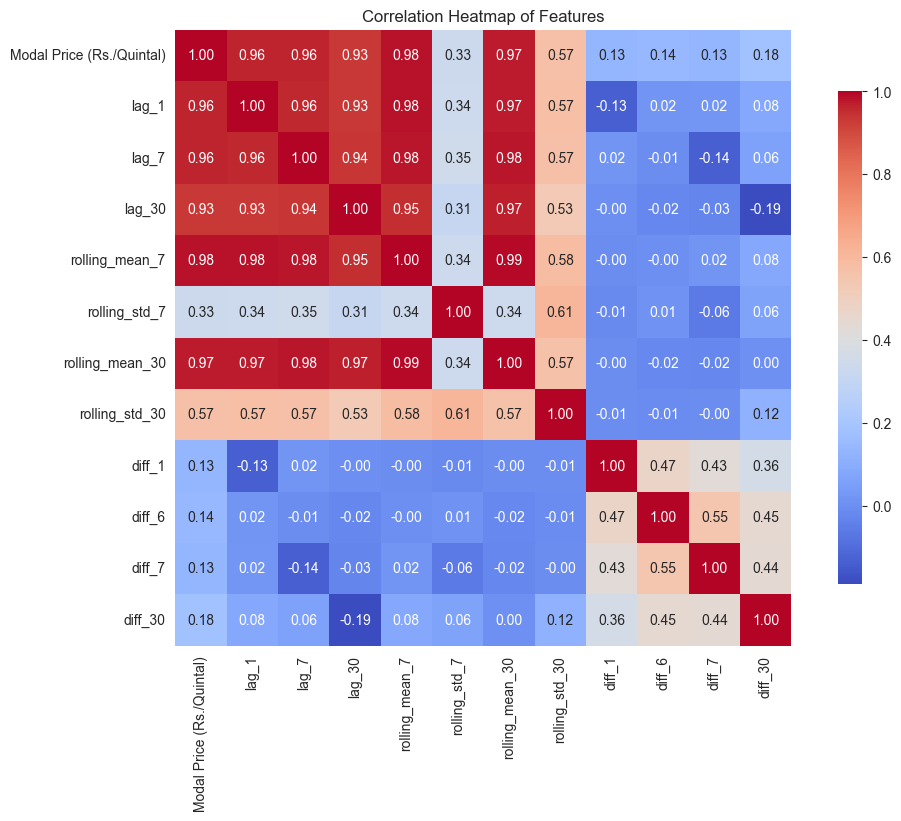

In [78]:
import seaborn as sns
correlation_matrix = average_prices.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()

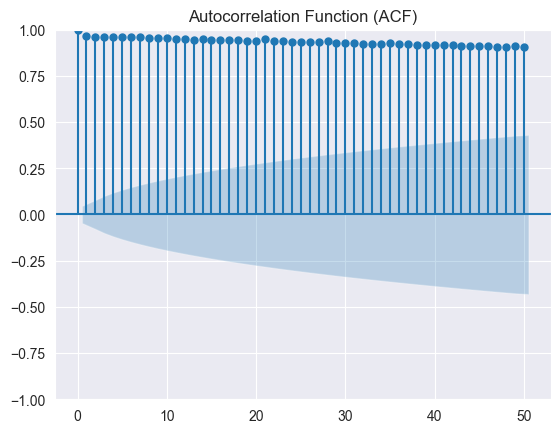

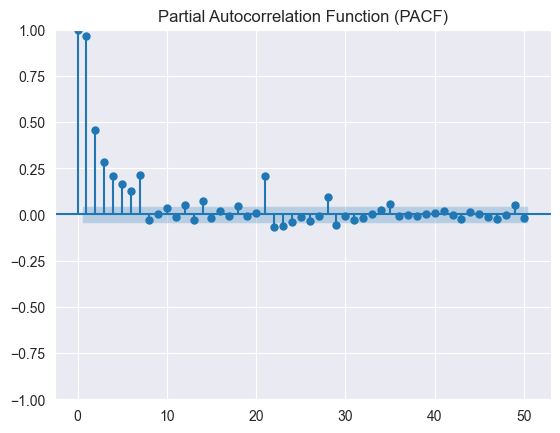

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(average_prices['Modal Price (Rs./Quintal)'].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(average_prices['Modal Price (Rs./Quintal)'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


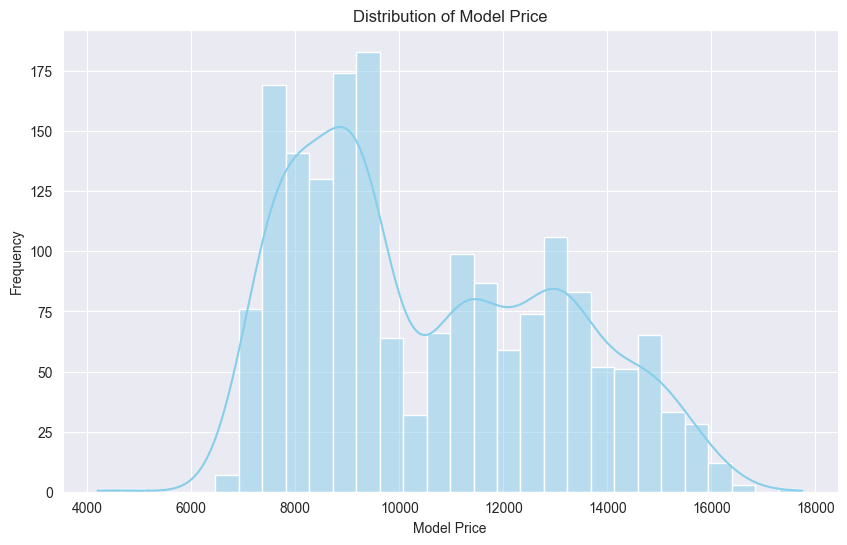

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(average_prices['Modal Price (Rs./Quintal)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Model Price')
plt.xlabel('Model Price')
plt.ylabel('Frequency')
plt.show()


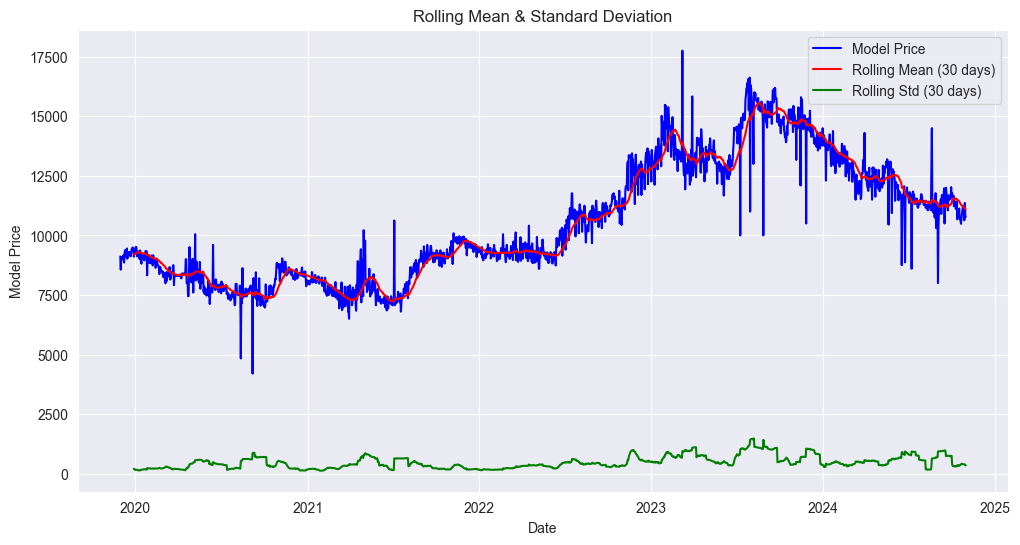

In [81]:
rolling_mean = average_prices['Modal Price (Rs./Quintal)'].rolling(window=30).mean()
rolling_std = average_prices['Modal Price (Rs./Quintal)'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(average_prices['Modal Price (Rs./Quintal)'], color='blue', label='Model Price')
plt.plot(rolling_mean, color='red', label='Rolling Mean (30 days)')
plt.plot(rolling_std, color='green', label='Rolling Std (30 days)')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Model Price')
plt.legend()
plt.show()


In [82]:
print(average_prices.isnull().sum())

Modal Price (Rs./Quintal)    0
lag_1                        0
lag_7                        0
lag_30                       0
rolling_mean_7               0
rolling_std_7                0
rolling_mean_30              0
rolling_std_30               0
diff_1                       0
diff_6                       0
diff_7                       0
diff_30                      0
dtype: int64


ADF Statistic: -1.054302149091707
p-value: 0.7329476120949503


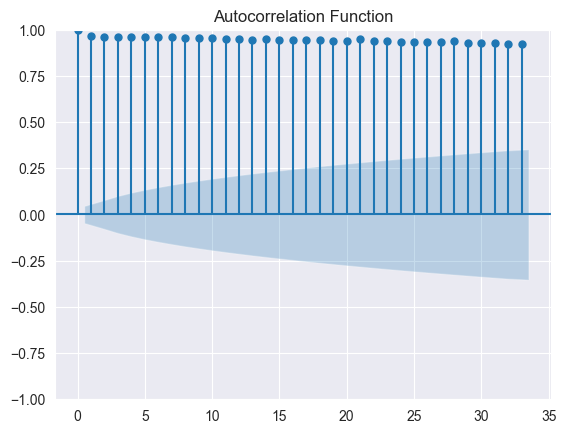

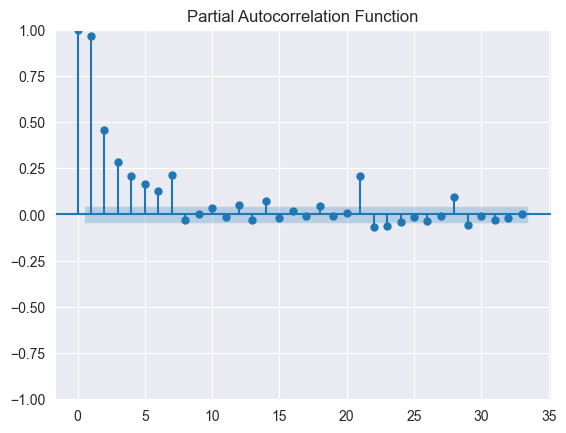

In [83]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

result = adfuller(average_prices['Modal Price (Rs./Quintal)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot ACF and PACF
plot_acf(average_prices['Modal Price (Rs./Quintal)'])
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(average_prices['Modal Price (Rs./Quintal)'])
plt.title('Partial Autocorrelation Function')
plt.show()


ADF Statistic: -10.561349991495577
p-value: 7.713728924026462e-19


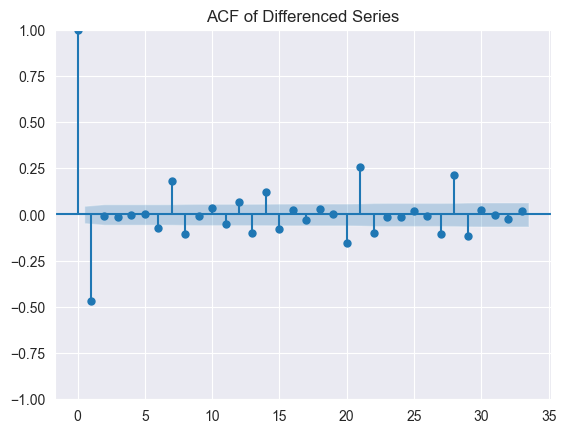

In [84]:
result_diff = adfuller(average_prices['diff_1'])
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

plot_acf(average_prices['diff_1'])
plt.title('ACF of Differenced Series')
plt.show()


ADF Statistic: -10.561349991495577
p-value: 7.713728924026462e-19


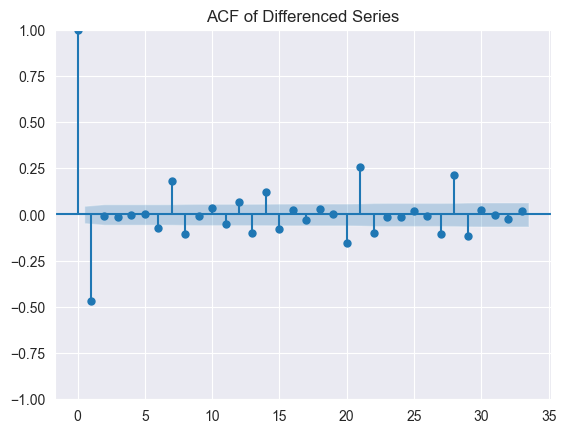

In [85]:
result_diff = adfuller(average_prices['diff_1'])
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

plot_acf(average_prices['diff_1'])
plt.title('ACF of Differenced Series')
plt.show()

ADF Statistic: -7.838002554948397
p-value: 6.04212944586736e-12


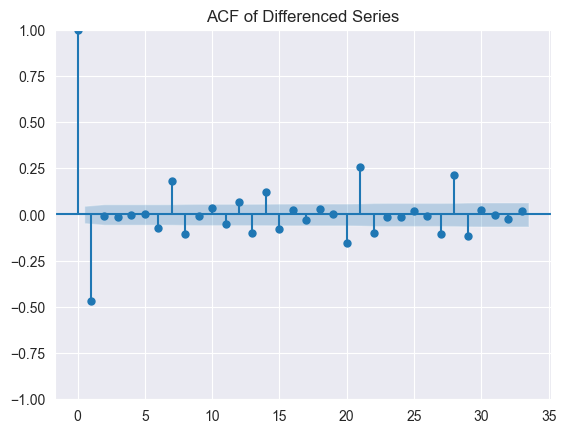

In [86]:
result_diff = adfuller(average_prices['diff_7'])
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

plot_acf(average_prices['diff_1'])
plt.title('ACF of Differenced Series')
plt.show()

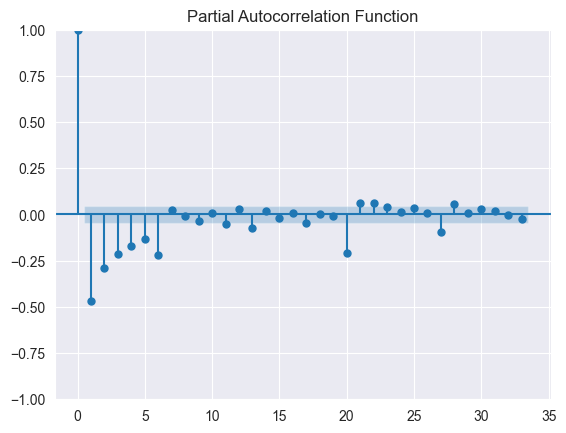

In [87]:
plot_pacf(average_prices['diff_1'])
plt.title('Partial Autocorrelation Function')
plt.show()


In [88]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools

# Assume you have already loaded your 'average_prices' DataFrame
# and that it has been indexed by 'Price Date'.

# Prepare your data
y = average_prices['Modal Price (Rs./Quintal)'].dropna()  # Drop any NaN values
train_size = int(len(y) * 0.7)  # 70% for training
y_train = y[:train_size]  # Training data
y_test = y[train_size:]    # Testing data
# 
# ARIMARUN = True
# # ARIMARUN = True
# if ARIMARUN:
#     p = q = range(0, 7)  # Possible values for p and q
#     d = range(0,7)        # Possible values for d
#     pdq = list(itertools.product(p, d, q))  # All combinations of p, d, q
# 
#     store = {}  # To store results
# 
#     for i, param in enumerate(pdq):
#         predictedValues = []
#         try:
#             # Fit the ARIMA model
#             model_arima = sm.tsa.arima.ARIMA(y_train, order=param)
#             model_arima_fit = model_arima.fit()
# 
#             # Make predictions
#             predict = model_arima_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
#             predictedValues = predict.values
# 
#             # Calculate SMAPE
#             smape = np.mean(np.abs(predictedValues - y_test.values) / (np.abs(predictedValues) + np.abs(y_test.values)))
# 
#             # Store SMAPE for the parameter combination
#             store[param] = smape
#             print(f"{i + 1}/{len(pdq)}: {param} : SMAPE: {smape:.4f} : Lowest : {min(store.items(), key=lambda x: x[1])}")
# 
#         except Exception as e:
#             #print(f"Error with parameters {param}: {e}")
#             continue
# 
#     # Sort and print results
#     sorted_dict = dict(sorted(store.items(), key=lambda item: item[1]))
#     print(sorted_dict)


In [89]:
# Fit the best model
best_order = (4, 0, 6)
best_model = sm.tsa.arima.ARIMA(y_train, order=best_order)
best_model_fit = best_model.fit()

# Make predictions
predictions = best_model_fit.forecast(steps=len(y_test))
predictions = predictions.values

# You can then compute SMAPE for predictions vs y_test
smape_best = np.mean(np.abs(predictions - y_test.values) / (np.abs(predictions) + np.abs(y_test.values)))
print(f"Best model: {best_order} : SMAPE: {smape_best:.4f}")


/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Best model: (4, 0, 6) : SMAPE: 0.0404


/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


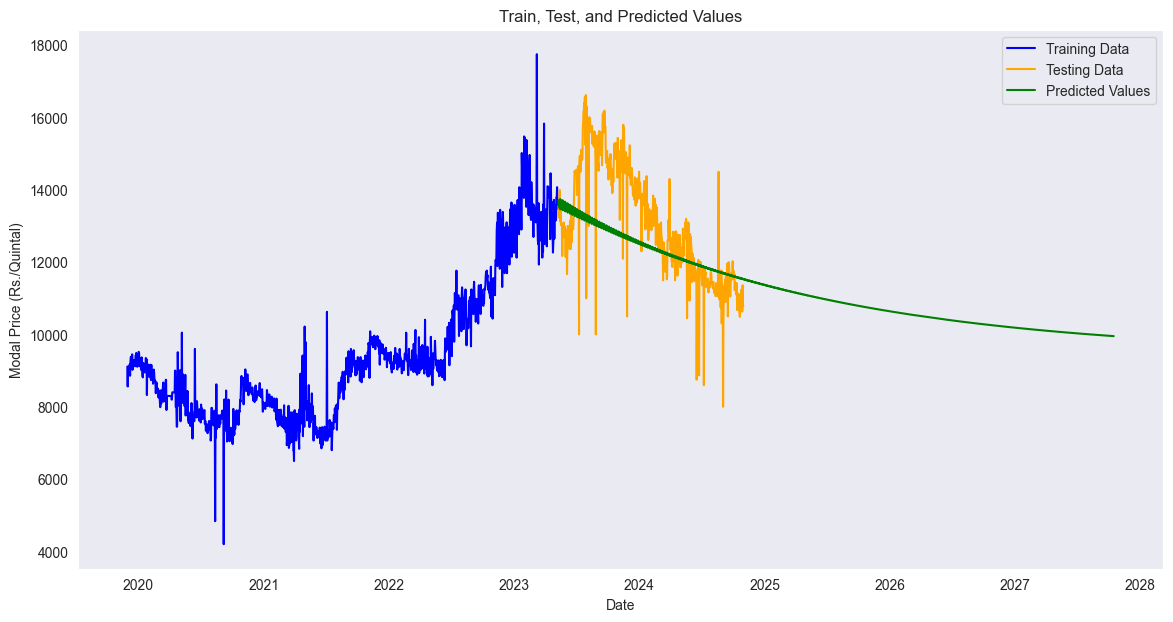

In [90]:
# Generate predictions
predictions = best_model_fit.forecast(steps=len(y_test) * 3)

# Create a new index for the predictions
predictions_index = pd.date_range(start=y_test.index[0], periods=len(predictions), freq=y_test.index.freq)

# Assign the new index to the predictions
predictions.index = predictions_index

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label="Training Data", color='blue')
plt.plot(y_test.index, y_test, label='Testing Data', color='orange')
plt.plot(predictions_index, predictions, label='Predicted Values', color='green')
plt.title('Train, Test, and Predicted Values')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.legend()
plt.grid()
plt.show()


In [91]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools

# Assume you have already loaded your 'average_prices' DataFrame
# and that it has been indexed by 'Price Date'.

# Prepare your data
y = average_prices['Modal Price (Rs./Quintal)'].dropna()  # Drop any NaN values
train_size = int(len(y) * 0.7)  # 70% for training
y_train = y[:train_size]        # Training data
y_test = y[train_size:]         # Testing data

# Set to True if running SARIMA
# SARIMARUN = True
# 
# if SARIMARUN:
#     # Define the parameter ranges for SARIMA
#     p = d = q = range(0, 4)  # Possible values for p, d, q
#     P = D = Q = range(0, 4)  # Possible values for seasonal P, D, Q
#     s = 7  # Seasonal period for weekly data
# 
#     # Create a list of all combinations for (p, d, q) and (P, D, Q, s)
#     pdq = list(itertools.product(p, d, q))  # All combinations of p, d, q
#     seasonal_pdq = [(x[0], x[1], x[2], s) for x in itertools.product(P, D, Q)]
# 
#     store = {}  # To store results
# 
#     for i, (param, param_seasonal) in enumerate(itertools.product(pdq, seasonal_pdq)):
#         predictedValues = []
#         try:
#             # Fit the SARIMA model
#             model_sarima = sm.tsa.statespace.SARIMAX(y_train, order=param, seasonal_order=param_seasonal)
#             model_sarima_fit = model_sarima.fit(disp=False)
# 
#             # Make predictions
#             predict = model_sarima_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
#             predictedValues = predict.values
# 
#             # Calculate SMAPE
#             smape = np.mean(np.abs(predictedValues - y_test.values) / (np.abs(predictedValues) + np.abs(y_test.values)))
# 
#             # Store SMAPE for the parameter combination
#             store[(param, param_seasonal)] = smape
#             print(f"{i + 1}/{len(pdq) * len(seasonal_pdq)}: {param} x {param_seasonal} : SMAPE: {smape:.4f} : Lowest : {min(store.items(), key=lambda x: x[1])}")
# 
#         except Exception as e:
#             # Uncomment the following line to see errors for specific parameters
#             # print(f"Error with parameters {param} x {param_seasonal}: {e}")
#             continue
# 
#     # Sort and print results
#     sorted_dict = dict(sorted(store.items(), key=lambda item: item[1]))
#     print(sorted_dict)


Best model: (0, 2, 3), Seasonal Order: (2, 1, 3, 7) : SMAPE: 0.0354


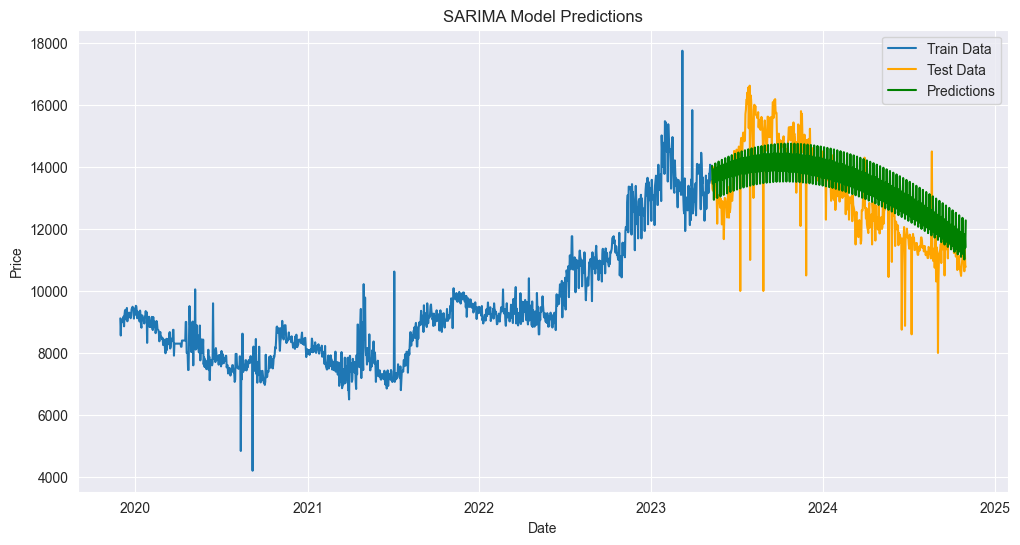

In [92]:
best_order = (0, 2, 3)
seasonal_order = (2, 1, 3, 7)

best_model = sm.tsa.statespace.SARIMAX(y_train, order=best_order, seasonal_order=seasonal_order)
best_model_fit = best_model.fit(disp=False)

predictions = best_model_fit.forecast(steps=len(y_test))

smape_best = np.mean(np.abs(predictions - y_test.values) / (np.abs(predictions) + np.abs(y_test.values)))
print(f"Best model: {best_order}, Seasonal Order: {seasonal_order} : SMAPE: {smape_best:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y.index[:train_size], y_train, label='Train Data')
plt.plot(y.index[train_size:], y_test, label='Test Data', color='orange')
plt.plot(y.index[train_size:], predictions, label='Predictions', color='green')
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [93]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
y = average_prices['Modal Price (Rs./Quintal)'].dropna()  # Drop any NaN values
train_size = int(len(y) * 0.7)  # 70% for training
y_train = y[:train_size]        # Training data
y_test = y[train_size:]         # Testing data


In [94]:
!pip install scikit-learn xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [95]:
!brew install libomp

==> Downloading https://formulae.brew.sh/api/formula.jws.json

==> Downloading https://formulae.brew.sh/api/cask.jws.json

To reinstall 19.1.3, run:
  brew reinstall libomp


In [96]:
average_prices

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,diff_1,diff_6,diff_7,diff_30
2019-11-30,9115.230769,9109.410256,9421.973684,8854.900000,9138.237209,169.909639,9331.141996,264.374928,5.820513,290.230769,-306.742915,260.330769
2019-12-01,8562.500000,9115.230769,8825.000000,9385.238095,9100.737209,257.140606,9303.717392,298.978136,-552.730769,-802.770270,-262.500000,-822.738095
2019-12-02,9067.380952,8562.500000,9365.270270,9147.720930,9058.181592,229.196344,9301.039393,300.777997,504.880952,-142.606852,-297.889318,-80.339978
2019-12-03,9058.829268,9067.380952,9209.987805,8768.888889,9036.587516,219.422328,9310.704072,287.452192,-8.551684,-26.386641,-151.158537,289.940379
2019-12-04,8991.325000,9058.829268,9085.215909,9199.375000,9023.174529,218.823203,9303.769072,292.692619,-67.504268,-266.220455,-93.890909,-208.050000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,262.875421,11188.554854,387.973280,-67.602703,610.583012,503.650238,-537.510395
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,221.193430,11158.261858,394.687693,-461.130631,-113.075758,149.452381,-908.789855
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,236.740272,11151.365678,389.045741,726.114583,449.829637,613.038826,-206.885417
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000,11050.683408,248.720607,11111.191116,356.536949,-541.018092,-222.558271,-91.188455,-1205.236842


In [97]:
average_prices['day_of_week'] = average_prices.index.dayofweek
average_prices['month'] = average_prices.index.month
average_prices['quarter'] = average_prices.index.quarter
average_prices['is_weekend'] = (average_prices.index.weekday >= 5).astype(int)


In [98]:
average_prices

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,diff_1,diff_6,diff_7,diff_30,day_of_week,month,quarter,is_weekend
2019-11-30,9115.230769,9109.410256,9421.973684,8854.900000,9138.237209,169.909639,9331.141996,264.374928,5.820513,290.230769,-306.742915,260.330769,5,11,4,1
2019-12-01,8562.500000,9115.230769,8825.000000,9385.238095,9100.737209,257.140606,9303.717392,298.978136,-552.730769,-802.770270,-262.500000,-822.738095,6,12,4,1
2019-12-02,9067.380952,8562.500000,9365.270270,9147.720930,9058.181592,229.196344,9301.039393,300.777997,504.880952,-142.606852,-297.889318,-80.339978,0,12,4,0
2019-12-03,9058.829268,9067.380952,9209.987805,8768.888889,9036.587516,219.422328,9310.704072,287.452192,-8.551684,-26.386641,-151.158537,289.940379,1,12,4,0
2019-12-04,8991.325000,9058.829268,9085.215909,9199.375000,9023.174529,218.823203,9303.769072,292.692619,-67.504268,-266.220455,-93.890909,-208.050000,2,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,262.875421,11188.554854,387.973280,-67.602703,610.583012,503.650238,-537.510395,5,10,4,1
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,221.193430,11158.261858,394.687693,-461.130631,-113.075758,149.452381,-908.789855,6,10,4,1
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,236.740272,11151.365678,389.045741,726.114583,449.829637,613.038826,-206.885417,0,10,4,0
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000,11050.683408,248.720607,11111.191116,356.536949,-541.018092,-222.558271,-91.188455,-1205.236842,1,10,4,0


RMSE: 935.6547279791222
MAE: 658.3278694770165


ValueError: x and y must have same first dimension, but have shapes (1437,) and (1257,)

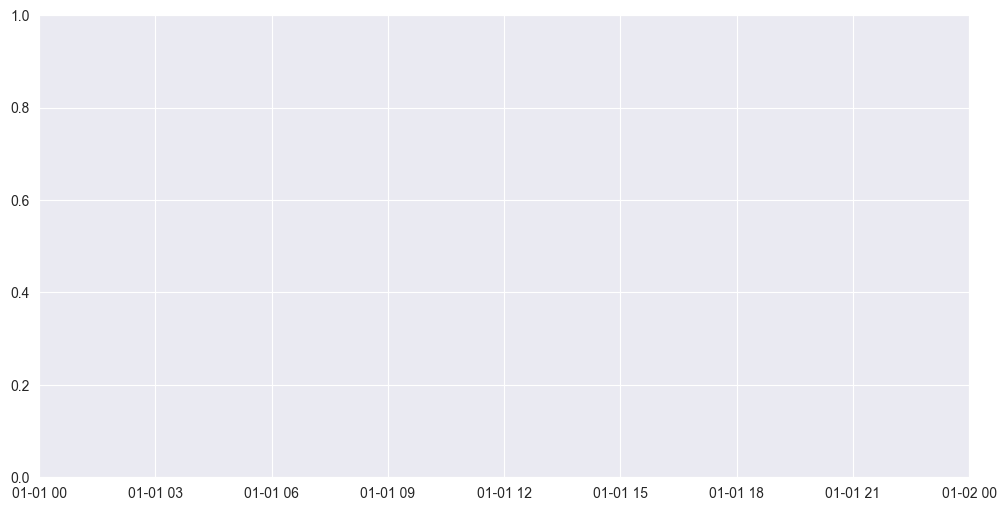

In [127]:
# import pandas as pd
# import numpy as np
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import matplotlib.pyplot as plt
# 
# # Load your data (assuming 'average_prices' is already your DataFrame)
# df = average_prices
# 
# selected_features = ['lag_1', 'lag_7', 'lag_30', 'rolling_mean_7', 'rolling_mean_30']
# target = 'Modal Price (Rs./Quintal)'
# 
# # Splitting data into features (X) and target (y)
# X = df[selected_features]
# y = df[target]
# 
# # Split the data into training and test sets (e.g., 80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
# 
# # Initialize the XGBoost model
# xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
# 
# # Train the model
# xgb_model.fit(X_train, y_train)
# 
# # Make predictions on the test set
# y_pred = xgb_model.predict(X_test)
# 
# # Evaluate the model
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mae = mean_absolute_error(y_test, y_pred)
# print(f"RMSE: {rmse}")
# print(f"MAE: {mae}")
# 
# plt.figure(figsize=(12, 6))
# plt.plot(y.index[:train_size], y_train, label='Train Data')
# plt.plot(y.index[train_size:], y_test, label='Test Data', color='orange')
# plt.plot(y.index[train_size:], y_pred, label='Predictions', color='green')
# plt.xlabel("Date")
# plt.ylabel("Modal Price (Rs./Quintal)")
# plt.title("XGBoost Model - Actual vs Predicted Prices")
# plt.legend()
# plt.show()


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_dept

/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters:  {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.7}
Best RMSE from GridSearchCV:  1475.8113653598898
Best RMSE: 813.5407129384116
Best MAE: 586.3105817095304


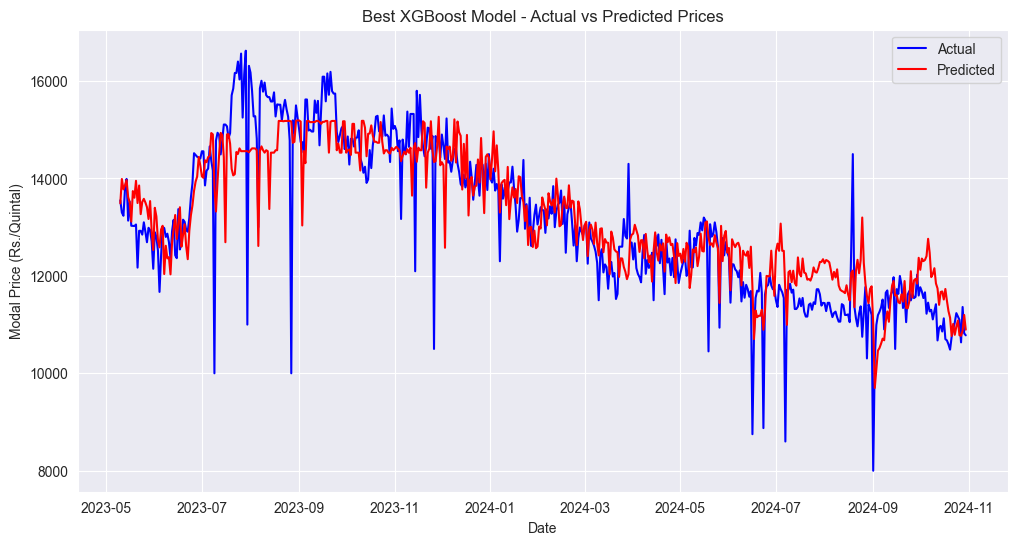

In [103]:
# from sklearn.model_selection import GridSearchCV
# 
# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [50, 100, 200],               # Number of boosting rounds
#     'learning_rate': [0.01, 0.1, 0.2],            # Learning rate (step size)
#     'max_depth': [3, 5, 7],                        # Maximum depth of a tree
#     'min_child_weight': [1, 3, 5],                 # Minimum sum of instance weight (hessian) needed in a child
#     'subsample': [0.7, 0.8, 1.0],                  # Subsample ratio of the training set
#     'colsample_bytree': [0.7, 0.8, 1.0],           # Subsample ratio of columns when constructing a tree
#     'gamma': [0, 0.1, 0.2]                        # Minimum loss reduction required to make a further partition
# }
# 
# # Initialize XGBRegressor model
# xgb_model = XGBRegressor(objective='reg:squarederror')
# 
# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
#                            cv=3, scoring='neg_mean_squared_error',
#                            n_jobs=-1, verbose=2)
# 
# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)
# 
# # Print the best parameters and best score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best RMSE from GridSearchCV: ", np.sqrt(-grid_search.best_score_))
# 
# # Best model
# best_model = grid_search.best_estimator_
# 
# # Make predictions on the test set using the best model
# y_pred_best = best_model.predict(X_test)
# 
# # Evaluate the best model
# rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
# mae_best = mean_absolute_error(y_test, y_pred_best)
# 
# print(f"Best RMSE: {rmse_best}")
# print(f"Best MAE: {mae_best}")
# 
# # Plotting actual vs predicted values for the best model
# plt.figure(figsize=(12, 6))
# plt.plot(y_test.index, y_test, label="Actual", color="blue")
# plt.plot(y_test.index, y_pred_best, label="Predicted", color="red")
# plt.xlabel("Date")
# plt.ylabel("Modal Price (Rs./Quintal)")
# plt.title("Best XGBoost Model - Actual vs Predicted Prices")
# plt.legend()
# plt.show()


Best RMSE: 813.5407
Best MAE: 586.3106


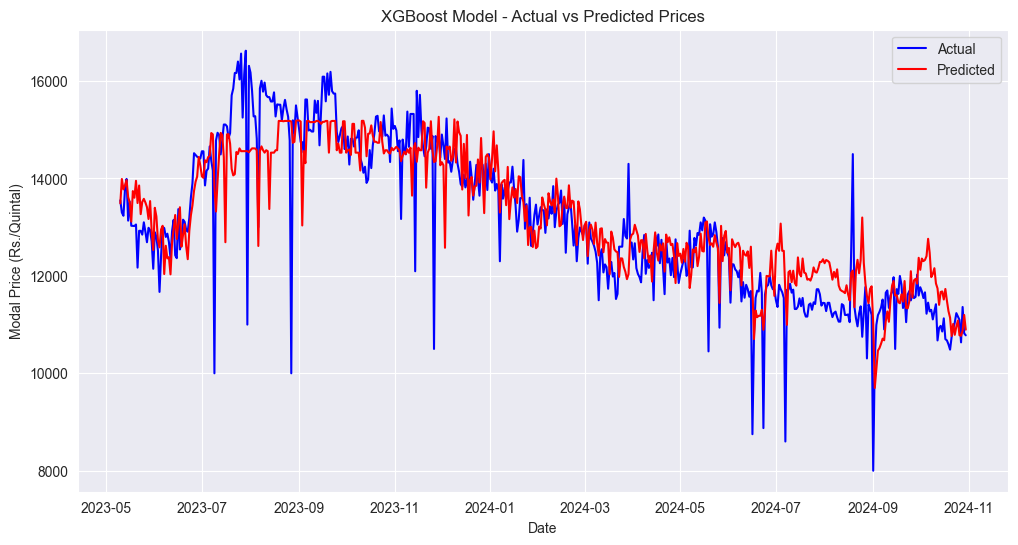

In [109]:
# Best hyperparameters from GridSearchCV
best_params = {
    'colsample_bytree': 0.7,
    'gamma': 0.2,
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_child_weight': 3,
    'n_estimators': 100,
    'subsample': 0.7
}

xgb_best_model = XGBRegressor(**best_params)
xgb_best_model.fit(X_train, y_train)
y_pred_best = xgb_best_model.predict(X_test)

# Evaluate the model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)

# Print evaluation metrics
print(f"Best RMSE: {rmse_best:.4f}")
print(f"Best MAE: {mae_best:.4f}")

# Plotting actual vs predicted values for the best model
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, y_pred_best, label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.title("XGBoost Model - Actual vs Predicted Prices")
plt.legend()
plt.show()


RMSE for SARIMA model: 1123.4625
MAE for SARIMA model: 928.5549


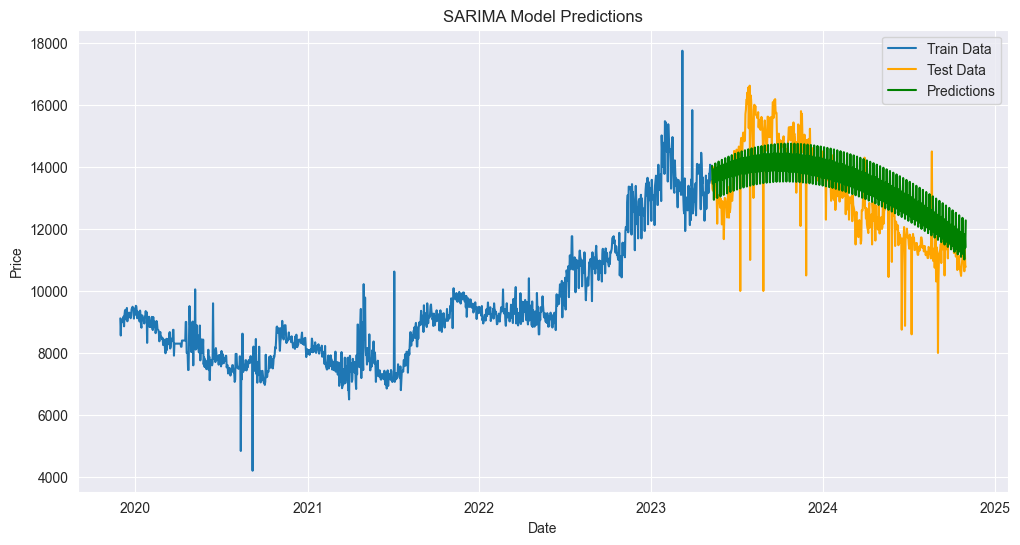

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse_sarima = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate MAE
mae_sarima = mean_absolute_error(y_test, predictions)

# Print the results
print(f"RMSE for SARIMA model: {rmse_sarima:.4f}")
print(f"MAE for SARIMA model: {mae_sarima:.4f}")

# Optionally, you can also plot the actual vs predicted values as you did before
plt.figure(figsize=(12, 6))
plt.plot(y.index[:train_size], y_train, label='Train Data')
plt.plot(y.index[train_size:], y_test, label='Test Data', color='orange')
plt.plot(y.index[train_size:], predictions, label='Predictions', color='green')
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [105]:
# Simple Averaging of SARIMA and XGBoost predictions
y_pred_aggregated_avg = (predictions + y_pred_best) / 2

# Calculate RMSE and MAE for the aggregated predictions
rmse_aggregated_avg = np.sqrt(mean_squared_error(y_test, y_pred_aggregated_avg))
mae_aggregated_avg = mean_absolute_error(y_test, y_pred_aggregated_avg)

print(f"RMSE (Simple Averaging): {rmse_aggregated_avg:.4f}")
print(f"MAE (Simple Averaging): {mae_aggregated_avg:.4f}")

RMSE (Simple Averaging): 888.1384
MAE (Simple Averaging): 681.7138


In [106]:
# Weights for each model (e.g., 60% weight to XGBoost and 40% to SARIMA)
weight_sarima = 0.4
weight_xgb = 0.6

# Weighted Averaging
y_pred_aggregated_weighted = weight_sarima * predictions + weight_xgb * y_pred_best

# Calculate RMSE and MAE for the weighted aggregated predictions
rmse_aggregated_weighted = np.sqrt(mean_squared_error(y_test, y_pred_aggregated_weighted))
mae_aggregated_weighted = mean_absolute_error(y_test, y_pred_aggregated_weighted)

print(f"RMSE (Weighted Averaging): {rmse_aggregated_weighted:.4f}")
print(f"MAE (Weighted Averaging): {mae_aggregated_weighted:.4f}")


RMSE (Weighted Averaging): 857.7218
MAE (Weighted Averaging): 643.9217


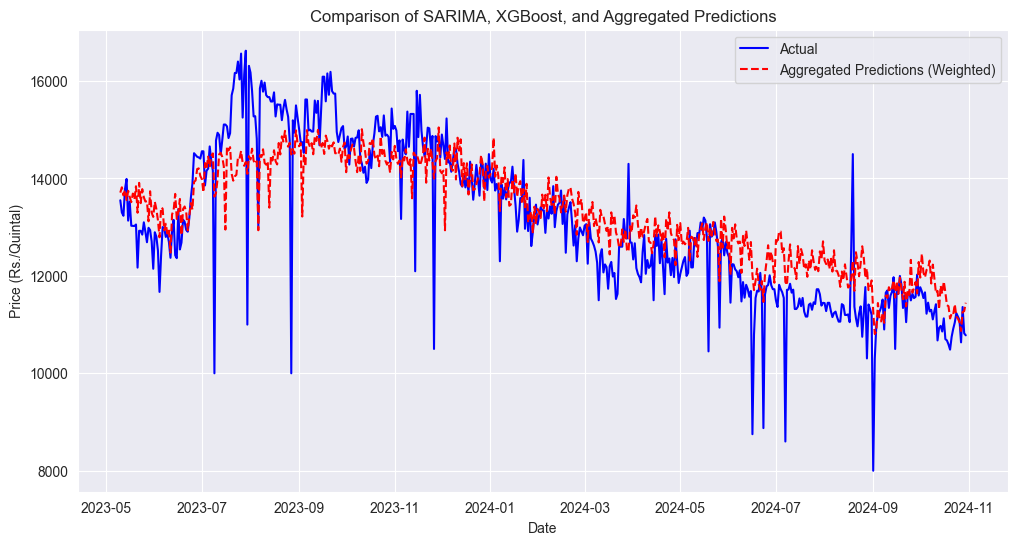

In [108]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values from both models and the aggregated predictions
plt.figure(figsize=(12, 6))

# Plot the actual values
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_aggregated_weighted, label='Aggregated Predictions (Weighted)', color='red', linestyle='--')

# Adding labels and title
plt.title('Comparison of SARIMA, XGBoost, and Aggregated Predictions')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()

# Show the plot
plt.show()


In [110]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/15/9a/a8d35652e869011a3bae9e0888f4c62157bf9067c9be15535602c73039dd/prophet-1.1.6-py3-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/52/99/de904580147b409352a98b92ed7d756c500d0818f5f759df741c3b6fa319/holidays-0.60-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm>=4.36.1 from https://files.pythonhosted.org/packages/41/73/02342de9c2d20922115f787e101527b831c0cffd2105c946c4a4826bcfd4/tqdm-4.66.6-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency information for importlib-resources from https://files.pythonho

In [116]:
average_prices

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,diff_1,diff_6,diff_7,diff_30,day_of_week,month,quarter,is_weekend
2019-11-30,9115.230769,9109.410256,9421.973684,8854.900000,9138.237209,169.909639,9331.141996,264.374928,5.820513,290.230769,-306.742915,260.330769,5,11,4,1
2019-12-01,8562.500000,9115.230769,8825.000000,9385.238095,9100.737209,257.140606,9303.717392,298.978136,-552.730769,-802.770270,-262.500000,-822.738095,6,12,4,1
2019-12-02,9067.380952,8562.500000,9365.270270,9147.720930,9058.181592,229.196344,9301.039393,300.777997,504.880952,-142.606852,-297.889318,-80.339978,0,12,4,0
2019-12-03,9058.829268,9067.380952,9209.987805,8768.888889,9036.587516,219.422328,9310.704072,287.452192,-8.551684,-26.386641,-151.158537,289.940379,1,12,4,0
2019-12-04,8991.325000,9058.829268,9085.215909,9199.375000,9023.174529,218.823203,9303.769072,292.692619,-67.504268,-266.220455,-93.890909,-208.050000,2,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,262.875421,11188.554854,387.973280,-67.602703,610.583012,503.650238,-537.510395,5,10,4,1
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,221.193430,11158.261858,394.687693,-461.130631,-113.075758,149.452381,-908.789855,6,10,4,1
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,236.740272,11151.365678,389.045741,726.114583,449.829637,613.038826,-206.885417,0,10,4,0
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000,11050.683408,248.720607,11111.191116,356.536949,-541.018092,-222.558271,-91.188455,-1205.236842,1,10,4,0


In [119]:
df

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,diff_1,diff_6,diff_7,diff_30,day_of_week,month,quarter,is_weekend
2019-11-30,9115.230769,9109.410256,9421.973684,8854.900000,9138.237209,169.909639,9331.141996,264.374928,5.820513,290.230769,-306.742915,260.330769,5,11,4,1
2019-12-01,8562.500000,9115.230769,8825.000000,9385.238095,9100.737209,257.140606,9303.717392,298.978136,-552.730769,-802.770270,-262.500000,-822.738095,6,12,4,1
2019-12-02,9067.380952,8562.500000,9365.270270,9147.720930,9058.181592,229.196344,9301.039393,300.777997,504.880952,-142.606852,-297.889318,-80.339978,0,12,4,0
2019-12-03,9058.829268,9067.380952,9209.987805,8768.888889,9036.587516,219.422328,9310.704072,287.452192,-8.551684,-26.386641,-151.158537,289.940379,1,12,4,0
2019-12-04,8991.325000,9058.829268,9085.215909,9199.375000,9023.174529,218.823203,9303.769072,292.692619,-67.504268,-266.220455,-93.890909,-208.050000,2,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,262.875421,11188.554854,387.973280,-67.602703,610.583012,503.650238,-537.510395,5,10,4,1
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,221.193430,11158.261858,394.687693,-461.130631,-113.075758,149.452381,-908.789855,6,10,4,1
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,236.740272,11151.365678,389.045741,726.114583,449.829637,613.038826,-206.885417,0,10,4,0
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000,11050.683408,248.720607,11111.191116,356.536949,-541.018092,-222.558271,-91.188455,-1205.236842,1,10,4,0


In [120]:
df['Price Date'] = df.index
df

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,diff_1,diff_6,diff_7,diff_30,day_of_week,month,quarter,is_weekend,Price Date
2019-11-30,9115.230769,9109.410256,9421.973684,8854.900000,9138.237209,169.909639,9331.141996,264.374928,5.820513,290.230769,-306.742915,260.330769,5,11,4,1,2019-11-30
2019-12-01,8562.500000,9115.230769,8825.000000,9385.238095,9100.737209,257.140606,9303.717392,298.978136,-552.730769,-802.770270,-262.500000,-822.738095,6,12,4,1,2019-12-01
2019-12-02,9067.380952,8562.500000,9365.270270,9147.720930,9058.181592,229.196344,9301.039393,300.777997,504.880952,-142.606852,-297.889318,-80.339978,0,12,4,0,2019-12-02
2019-12-03,9058.829268,9067.380952,9209.987805,8768.888889,9036.587516,219.422328,9310.704072,287.452192,-8.551684,-26.386641,-151.158537,289.940379,1,12,4,0,2019-12-03
2019-12-04,8991.325000,9058.829268,9085.215909,9199.375000,9023.174529,218.823203,9303.769072,292.692619,-67.504268,-266.220455,-93.890909,-208.050000,2,12,4,0,2019-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,262.875421,11188.554854,387.973280,-67.602703,610.583012,503.650238,-537.510395,5,10,4,1,2024-10-26
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,221.193430,11158.261858,394.687693,-461.130631,-113.075758,149.452381,-908.789855,6,10,4,1,2024-10-27
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,236.740272,11151.365678,389.045741,726.114583,449.829637,613.038826,-206.885417,0,10,4,0,2024-10-28
2024-10-29,10820.263158,11361.281250,10911.451613,12025.500000,11050.683408,248.720607,11111.191116,356.536949,-541.018092,-222.558271,-91.188455,-1205.236842,1,10,4,0,2024-10-29


In [125]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
df = average_prices
df_prophet = df[['Price Date', 'Modal Price (Rs./Quintal)']].rename(columns={'Price Date': 'ds', 'Modal Price (Rs./Quintal)': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Split the data into train and test sets (e.g., 80% train, 20% test)
train_size = int(len(df_prophet) * 0.8)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model to the training data
prophet_model.fit(train_data)

# Make future dataframe for predictions (use only the number of periods, no train_data argument here)
future = prophet_model.make_future_dataframe(train_data, periods=len(test_data))

# Forecast using the trained model
forecast = prophet_model.predict(future)

# Extract predictions for the test set
y_pred_prophet = forecast['yhat'][-len(test_data):].values

# Evaluate the model
rmse_prophet = np.sqrt(mean_squared_error(test_data['y'], y_pred_prophet))
mae_prophet = mean_absolute_error(test_data['y'], y_pred_prophet)

print(f"RMSE for Prophet: {rmse_prophet:.4f}")
print(f"MAE for Prophet: {mae_prophet:.4f}")

# Plotting actual vs predicted values for Prophet
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], test_data['y'], label="Actual", color="blue")
plt.plot(test_data['ds'], y_pred_prophet, label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.title("Prophet Model - Actual vs Predicted Prices")
plt.legend()
plt.show()


19:24:48 - cmdstanpy - INFO - Chain [1] start processing
19:24:49 - cmdstanpy - INFO - Chain [1] done processing


TypeError: Prophet.make_future_dataframe() got multiple values for argument 'periods'

In [124]:
df_prophet

,ds,y
2019-11-30,2019-11-30,9115.230769
2019-12-01,2019-12-01,8562.500000
2019-12-02,2019-12-02,9067.380952
2019-12-03,2019-12-03,9058.829268
2019-12-04,2019-12-04,8991.325000
...,...,...
2024-10-26,2024-10-26,11096.297297
2024-10-27,2024-10-27,10635.166667
2024-10-28,2024-10-28,11361.281250
2024-10-29,2024-10-29,10820.263158
